In [2]:
import os
import math
import time
import random
from pathlib import Path

import numpy as np
import PIL
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

### Some functions

In [3]:
def load_dataset(path):
    dataset = {}
    
    images_paths = [f for f in Path(path).glob("**/*") if f.is_file()]
    for path in tqdm(images_paths):
        class_name = path.parts[-2]
        if class_name not in dataset:
            dataset[class_name] = []
        image = cv2.imread(str(path))
        dataset[class_name].append(image)
    
    return dataset

In [4]:
def save_dataset(dataset, path):
    for class_name in dataset.keys():
        for image in dataset[class_name]:
            directory = Path(path) / class_name
            directory.mkdir(parents=True, exist_ok=True)
            filename = str(time.time()).replace('.', '') + '.png'
            full_path = directory / filename
            cv2.imwrite(str(full_path), image)

In [5]:
def map_dataset(dataset, fun):
    new_dataset = {}
    for class_name, images_list in tqdm(dataset.items()):
        new_dataset[class_name] = [fun(image) for image in images_list]
    return new_dataset

In [6]:
def show_image(image, figsize=(6, 6)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [7]:
def show_dataset(dataset):
    images = [random.choice(images) for images in dataset.values()]
    joined = np.hstack(images)
    show_image(joined, figsize=(13, 4))

### Loading raw images

In [27]:
dataset = load_dataset('data/raw_flat')

100%|██████████| 10019/10019 [02:36<00:00, 64.02it/s]


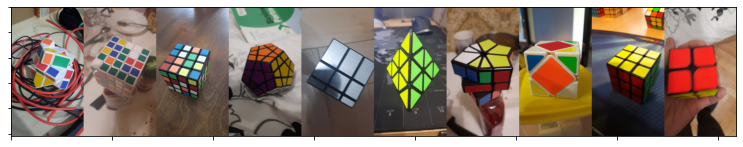

In [40]:
show_dataset(dataset)

### Cropping images

In [42]:
def get_cropped_image(image):
    src_h, src_w, _ = image.shape
    offset = (src_h - src_w) // 2
    return image[offset:offset+src_w, :, :]

In [43]:
cropped_dataset = map_dataset(dataset, get_cropped_image)

100%|██████████| 10/10 [00:00<00:00, 1111.02it/s]


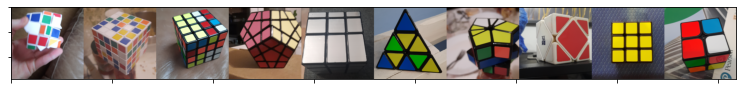

In [10]:
show_dataset(cropped_dataset)

In [44]:
save_dataset(cropped_dataset, 'data/cropped')

In [8]:
cropped_dataset = load_dataset('data/cropped')

100%|██████████| 10019/10019 [01:40<00:00, 99.83it/s]


### Resizing images

In [11]:
def get_resized_image(image):
    return cv2.resize(image, (512, 512))

In [12]:
resized_dataset = map_dataset(cropped_dataset, get_resized_image)

100%|██████████| 10/10 [00:02<00:00,  3.79it/s]


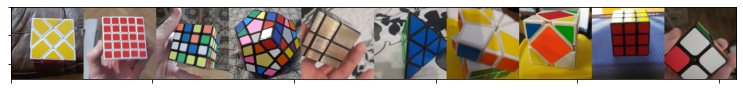

In [13]:
show_dataset(resized_dataset)

In [14]:
save_dataset(resized_dataset, 'data/train')

In [10]:
resized_dataset = load_dataset('data/train')

100%|██████████| 10019/10019 [00:49<00:00, 201.40it/s]
